In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# seed 값 설정 
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [39]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(40, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'),
    Conv2D(68, (4,4), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.5),
    Flatten(),
    Dense(130, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 25, 25, 40)        680       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 68)        43588     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 68)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 11, 11, 68)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 8228)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 130)               1069770   
_________________________________________________________________
dropout_14 (Dropout)         (None, 130)              

In [40]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [41]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [42]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
                              verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [43]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30,
                    batch_size=200, #epoch=5, verbose=2,
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.2044 - accuracy: 0.9369 - val_loss: 0.0490 - val_accuracy: 0.9847

Epoch 00001: val_loss improved from inf to 0.04897, saving model to ./model/mnist-cnn-01-0.0490.hdf5
Epoch 2/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0639 - accuracy: 0.9801 - val_loss: 0.0352 - val_accuracy: 0.9881

Epoch 00002: val_loss improved from 0.04897 to 0.03524, saving model to ./model/mnist-cnn-02-0.0352.hdf5
Epoch 3/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0270 - val_accuracy: 0.9906

Epoch 00003: val_loss improved from 0.03524 to 0.02695, saving model to ./model/mnist-cnn-03-0.0270.hdf5
Epoch 4/30
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0263 - val_accuracy: 0.9909

Epoch 00004: val_loss improved from 0.02695 to 

In [44]:
from keras.models import load_model
del model
model = load_model('model/mnist-cnn-07-0.0237.hdf5')

In [45]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(x_test, y_test, verbose=0)[1]))


 Test Accuracy : 0.9921


In [46]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

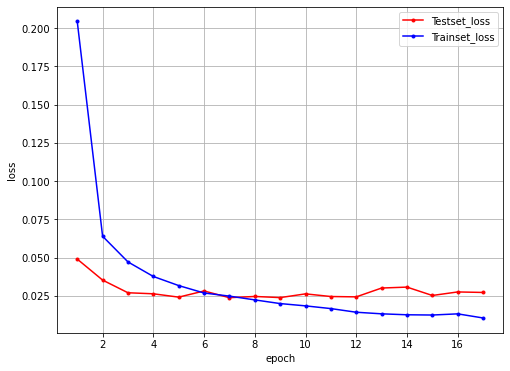

In [47]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss) + 1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c="blue", label="Trainset_loss")

#그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 결론 : Best Model은 Epoch 15, 정확도는 99.21%